## Perform Exploratory Data Analysis - Correlation
- Examine the level of correlation between each feature
- Examine their level of correlation to the outcome (response feature)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the cleaned source file into a DataFrame.
data_dir = os.path.join(os.getcwd(), 'Data')
source_file = os.path.join(data_dir, 'WA-Telco-Customer-Churn-ML.xlsx')
df = pd.read_excel(source_file, header=0)

# Drop the Unique Identifier
df = df.drop(labels=['customerID'], axis=1)

In [3]:
# Make appropriate data type assignments.
df.gender = pd.to_numeric(df.gender, downcast='integer', errors='coerce')
df.SeniorCitizen = pd.to_numeric(df.SeniorCitizen, downcast='integer', errors='coerce')
df.Partner = pd.to_numeric(df.Partner, downcast='integer', errors='coerce')
df.Dependents = pd.to_numeric(df.Dependents, downcast='integer', errors='coerce')
df.tenure = pd.to_numeric(df.tenure, downcast='integer', errors='coerce')
df.PhoneService = pd.to_numeric(df.PhoneService, downcast='integer', errors='coerce')
df.MultipleLines = pd.to_numeric(df.MultipleLines, downcast='integer', errors='coerce')
df.InternetService = pd.to_numeric(df.InternetService, downcast='integer', errors='coerce')
df.OnlineSecurity = pd.to_numeric(df.OnlineSecurity, downcast='integer', errors='coerce')
df.OnlineBackup = pd.to_numeric(df.OnlineBackup, downcast='integer', errors='coerce')
df.DeviceProtection = pd.to_numeric(df.DeviceProtection, downcast='integer', errors='coerce')
df.TechSupport = pd.to_numeric(df.TechSupport, downcast='integer', errors='coerce')
df.StreamingTV = pd.to_numeric(df.StreamingTV, downcast='integer', errors='coerce')
df.StreamingMovies = pd.to_numeric(df.StreamingMovies, downcast='integer', errors='coerce')
df.Contract = pd.to_numeric(df.Contract, downcast='integer', errors='coerce')
df.PaperlessBilling = pd.to_numeric(df.PaperlessBilling, downcast='integer', errors='coerce')
df.PaymentMethod = pd.to_numeric(df.PaymentMethod, downcast='integer', errors='coerce')
df.MonthlyCharges = pd.to_numeric(df.MonthlyCharges, downcast='float', errors='coerce')
df.TotalCharges = pd.to_numeric(df.TotalCharges, downcast='float', errors='coerce')
df.Churn = pd.to_numeric(df.Churn, downcast='integer', errors='coerce')

# Validate new data type assignments.
df.dtypes

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                 int8
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float32
TotalCharges        float32
Churn                  int8
dtype: object

### Examine Correlations Among the Entire Feature-Set

In [4]:
# Create a Pearson Correlation Matrix of the Entire Feature-Set
df.corr('pearson')  # default | kendall | spearman rank

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


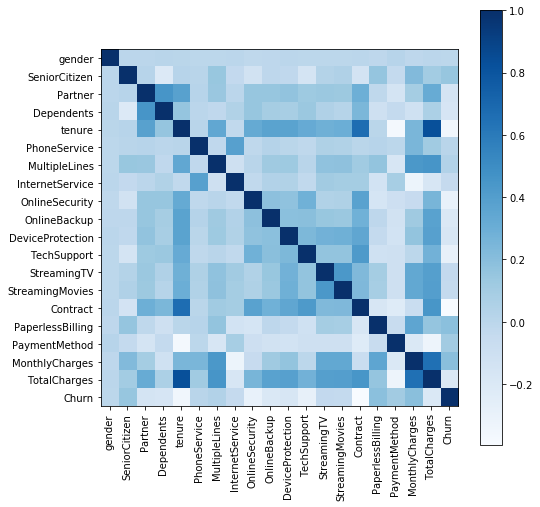

In [5]:
# Plot a Colorbar of the Entire Feature-Set
plt.figure(figsize=(8,8))
plt.imshow(df.corr('pearson'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.colorbar()

### Examine Correlations Among Only the Continuous Numerical Features and Churn

In [6]:
# Create a Pearson Correlation Matrix of the Continuous Numerical Features and the Response (Churn)
num_df = df[['tenure','MonthlyCharges','TotalCharges', 'Churn']]
num_df.corr('pearson')

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.826178,0.651174,1.000000,-0.198324
Churn,-0.352229,0.193356,-0.198324,1.000000


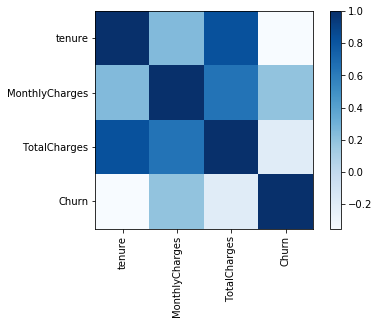

In [7]:
# Plot a Colorbar of the Continuous Numerical Features and the Response (Churn)
plt.imshow(num_df.corr('pearson'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(num_df.columns))]
plt.xticks(tick_marks, num_df.columns, rotation='vertical')
plt.yticks(tick_marks, num_df.columns)
plt.colorbar()

### Examine Correlations Among Only PhoneService, MultipleLines and Churn

In [ ]:
# Create a Spearman Correlation Matrix of Only PhoneService, MultipleLines and Churn.
phoneline_df = df[['PhoneService','MultipleLines','Churn']]
phoneline_df.rank()
phoneline_df.corr('spearman')

In [ ]:
# Plot a Colorbar of Only PhoneService, MultipleLines and Churn. 
plt.imshow(phoneline_df.corr('spearman'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(phoneline_df.columns))]
plt.xticks(tick_marks, phoneline_df.columns, rotation='vertical')
plt.yticks(tick_marks, phoneline_df.columns)
plt.colorbar()

### Examine Correlations Between the Internet-Related Services and Churn

In [ ]:
# Plot a Spearman Correlation Matrix of Only the Internet-Related Services and Churn.
intsvcs_df = df[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies', 'Churn']]
intsvcs_df.rank()
intsvcs_df.corr('spearman') # spearman rank

In [ ]:
# Plot a Colorbar of Only the Internet-Related Services and Churn.
plt.figure(figsize=(6,6))
plt.imshow(intsvcs_df.corr('spearman'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(intsvcs_df.columns))]
plt.xticks(tick_marks, intsvcs_df.columns, rotation='vertical')
plt.yticks(tick_marks, intsvcs_df.columns)
plt.colorbar()

### Examine Correlation Between the Remaining Independent Categorical Features and Churn

In [ ]:
# Plot a Spearman Correlation Matrix of Only the Remaining Independent Categorical Features and Churn.
ind_df = df[['gender','SeniorCitizen','Partner','Dependents','Contract','PaperlessBilling','PaymentMethod', 'Churn']]
ind_df.rank()
ind_df.corr('spearman') # spearman rank

In [ ]:
# Plot a Colorbar of Only the Remaining Independent Categorical Features and Churn.
plt.figure(figsize=(6,6))
plt.imshow(ind_df.corr('spearman'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(ind_df.columns))]
plt.xticks(tick_marks, ind_df.columns, rotation='vertical')
plt.yticks(tick_marks, ind_df.columns)
plt.colorbar()